# Lab Sheet 1

This is an introduction into standard libraries used in ML and how to load an existing data set.

## Libraries

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [56]:
# read csv (comma separated value) into data
data = pd.read_csv('loans.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [66]:
# to see features and target variable
data.head()

,ID,Amount,Salary,Loan-Salary Ratio,Age,Occupation,Property,Type,Outcome
0,1,245100,66400,3.69,44,industrial,farm,stb,repay
1,2,90600,75300,1.20,41,industrial,farm,stb,repay
2,3,195600,52100,3.75,37,industrial,farm,ftb,default
3,4,157800,67600,2.33,44,industrial,apartment,ftb,repay
4,5,150800,35800,4.21,39,professional,apartment,stb,default


## Inspecting the data

In [58]:
# We want to know if there are any NaN values and the length of this data so lets look at info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
ID                   25 non-null int64
Amount               25 non-null int64
Salary               25 non-null int64
Loan-Salary Ratio    25 non-null float64
Age                  25 non-null int64
Occupation           25 non-null object
Property             25 non-null object
Type                 25 non-null object
Outcome              25 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 1.8+ KB


In [59]:
data.describe()

,ID,Amount,Salary,Loan-Salary Ratio,Age
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,179460.000000,59220.000000,3.252000,36.360000
std,7.359801,49808.332636,12880.670272,1.478222,8.445314
min,1.000000,83000.000000,32300.000000,1.200000,17.000000
25%,7.000000,150800.000000,52100.000000,2.460000,30.000000
50%,13.000000,175200.000000,61100.000000,3.150000,37.000000
75%,19.000000,210000.000000,66400.000000,3.870000,43.000000
max,25.000000,284100.000000,79700.000000,8.800000,51.000000


farm         10
house         8
apartment     7
Name: Property, dtype: int64

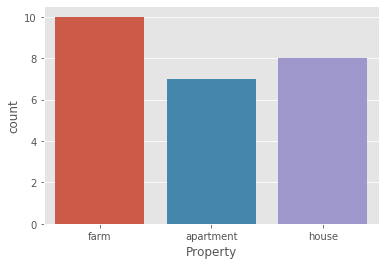

In [60]:
sns.countplot(x="Property", data=data)
data.loc[:,'Property'].value_counts()

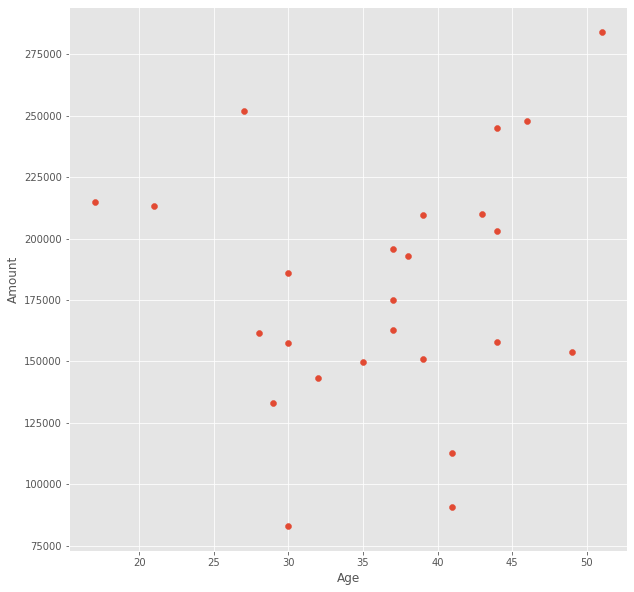

In [72]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
x = np.array(data.loc[:,'Age']).reshape(-1,1)
y = np.array(data.loc[:,'Amount']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

## Fitting a model

R^2 score:  0.01936181837808726


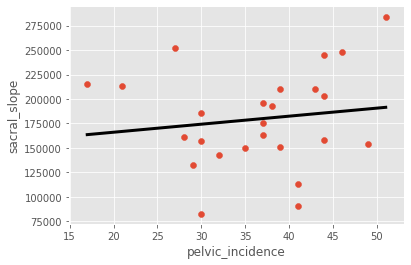

In [73]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()